# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Humam Alwi Ahmad
- **Email:** humamalwi21@gmail.com
- **ID Dicoding:** humam_alwi_ahmad

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Jumlah Penyewaan Sepeda dan Pengguna Terdaftar dalam Beberapa Bulan Terakhir?
- Pada Jam dan Tanggal Berapa Jumlah Penyewa Sepeda Terbanyak?
- Bagaimana Pengaruh Suhu yang Dirasa Terhadap Jumlah Penyewaan Sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/hoemalwi/Dataset/refs/heads/main/day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/hoemalwi/Dataset/refs/heads/main/hour.csv")
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data di atas berisi tentang penyewaan sepeda dan kondisi lingkungan penyewa sepeda yang disajikan dalam hari maupun jam pada rentang tahun 2011 sampai 2012
- Atribut dalam data tersebut berisi:
  - instant: indeks catatan
  - dteday: tanggal
  - season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
  - yr: tahun (0: 2011, 1: 2012)
  - mnth: bulan (1 hingga 12)
  - hr: jam (0 hingga 23)
  - holiday: apakah hari tersebut adalah hari libur atau tidak
  - weekday: hari dalam seminggu
  - workingday: jika hari tersebut bukan akhir pekan atau hari libur, maka bernilai 1, jika tidak maka bernilai 0.
  - weathersit:

    1: Cerah, Beberapa awan, Sebagian besar cerah

    2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Beberapa awan, Kabut

    3: Salju ringan, Hujan ringan + Petir + Awan berserakan, Hujan ringan + Awan berserakan

    4: Hujan berat + Butir es + Petir + Kabut, Salju + Kabut
  - temp: Suhu terstandardisasi dalam Celsius.
  - atemp: Suhu terasa terstandardisasi dalam Celsius.
  - hum: Kelembaban terstandardisasi.
  - windspeed: Kecepatan angin terstandardisasi.
  - casual: jumlah pengguna kasual
  - registered: jumlah pengguna terdaftar
  - cnt: jumlah total sepeda sewaan termasuk pengguna kasual dan terdaftar

### Assessing Data

Menilai Tabel  ``` day_df```









In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi data:", day_df.duplicated().sum())

Jumlah duplikasi data: 0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


 Menilai Tabel ``` hour_df ```

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi data:", hour_df.duplicated().sum())

Jumlah duplikasi data: 0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Beberapa attribute pada tabel terdapat tipe data yang kurang tepat seperti atribut dteday yang seharusnya bertipe data datetime
- Tidak terdapat Duplikasi data pada kedua tabel tersebut
- Tidak terdapat Missing value atau Inaccurate value pada data di atas

### Cleaning Data

#####Membersihkan Tabel ```day_df```

Mengubah Tipe Data

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#####Membersihkan Tabel ```hour_df```

Mengubah Tipe Data

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Membersihkan data dengan mengubah tipe data yang kurang tepat seperti tipe data object pada atribut dteday diubah ke tipe data date di setiap tabel pada data tersebut



## Exploratory Data Analysis (EDA)

### Explore ```day_df```

In [14]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
225,226,2011-08-14,3,0,8,0,0,0,2,0.676667,0.624388,0.817500,0.222633,1338,2482,3820
636,637,2012-09-28,4,1,9,0,5,1,2,0.619167,0.585863,0.690000,0.164179,1045,6370,7415
529,530,2012-06-13,2,1,6,0,3,1,1,0.655833,0.611117,0.582083,0.343279,1173,6248,7421
718,719,2012-12-19,4,1,12,0,3,1,1,0.332500,0.342162,0.625417,0.184092,333,4934,5267
214,215,2011-08-03,3,0,8,0,3,1,2,0.731667,0.679937,0.657500,0.135583,467,3107,3574
257,258,2011-09-15,3,0,9,0,4,1,2,0.577500,0.553671,0.709167,0.271146,428,3231,3659
638,639,2012-09-30,4,1,9,0,0,0,1,0.526667,0.517663,0.583333,0.134958,2015,4874,6889
267,268,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,5010
472,473,2012-04-17,2,1,4,0,2,1,1,0.608333,0.598487,0.390417,0.273629,989,5702,6691


In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
day_df.groupby(by="dteday").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
})

,registered,casual,cnt
dteday,,,
2011-01-01,654,331,985
2011-01-02,670,131,801
2011-01-03,1229,120,1349
2011-01-04,1454,108,1562
2011-01-05,1518,82,1600
...,...,...,...
2012-12-27,1867,247,2114
2012-12-28,2451,644,3095
2012-12-29,1182,159,1341


In [17]:
day_df.groupby(["yr", "mnth"]).agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
})

registered  casual     cnt
yr mnth                            
0  1          35116    3073   38189
   2          41973    6242   48215
   3          51219   12826   64045
   4          72524   22346   94870
   5         104771   31050  135821
   6         112900   30612  143512
   7         104889   36452  141341
   8         107849   28842  136691
   9         100873   26545  127418
   10         98289   25222  123511
   11         86573   15594  102167
   12         78875    8448   87323
1  1          87775    8969   96744
   2          94416    8721  103137
   3         133257   31618  164875
   4         135768   38456  174224
   5         151630   44235  195865
   6         159536   43294  202830
   7         161902   41705  203607
   8         171306   43197  214503
   9         174795   43778  218573
   10        164303   34538  198841
   11        131655   21009  152664
   12        110468   13245  123713

In [18]:
day_df["atemp_group"] = day_df.atemp.apply(lambda x: "Low" if x < 0.3 else ("Medium" if x <= 0.6 else "High"))
day_df.groupby(by="atemp_group").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
})

,registered,casual,cnt
atemp_group,,,
High,865160,245783,1110943
Low,280602,30468,311070
Medium,1526900,343766,1870666


In [19]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_group
488,489,2012-05-03,2,1,5,0,4,1,2,0.560000,0.537242,0.768333,0.133696,764,5657,6421,Medium
45,46,2011-02-15,1,0,2,0,2,1,1,0.266087,0.254274,0.314348,0.291374,140,1675,1815,Low
695,696,2012-11-26,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650,337,4750,5087,Medium
326,327,2011-11-23,4,0,11,0,3,1,2,0.440833,0.430537,0.757917,0.335825,112,2454,2566,Medium
588,589,2012-08-11,3,1,8,0,6,0,2,0.692500,0.638267,0.732917,0.206479,2247,4052,6299,High
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605,Medium
469,470,2012-04-14,2,1,4,0,6,0,1,0.495000,0.487996,0.502917,0.190917,2795,4665,7460,Medium
526,527,2012-06-10,2,1,6,0,0,0,1,0.726667,0.663517,0.538333,0.133721,2224,4374,6598,High
375,376,2012-01-11,1,1,1,0,3,1,2,0.274167,0.282821,0.847500,0.131221,92,2085,2177,Low
340,341,2011-12-07,4,0,12,0,3,1,3,0.410000,0.400246,0.970417,0.266175,50,655,705,Medium


### Explore ```hour_df```

In [20]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5110,5111,2011-08-05,3,0,8,20,0,5,1,1,0.72,0.6667,0.58,0.2239,70,221,291
742,743,2011-02-03,1,0,2,8,0,4,1,1,0.14,0.1212,0.50,0.3582,4,184,188
7164,7165,2011-10-31,4,0,10,3,0,1,1,1,0.24,0.2576,0.87,0.1045,0,3,3
2321,2322,2011-04-11,2,0,4,15,0,1,1,1,0.74,0.6667,0.48,0.5224,56,85,141
6075,6076,2011-09-15,3,0,9,17,0,4,1,3,0.48,0.4697,0.82,0.4627,31,230,261
14161,14162,2012-08-18,3,1,8,6,0,6,0,1,0.60,0.5606,0.83,0.2239,4,23,27
3934,3935,2011-06-17,2,0,6,20,0,5,1,1,0.64,0.5909,0.78,0.1045,40,192,232
15741,15742,2012-10-23,4,1,10,2,0,2,1,1,0.44,0.4394,0.88,0.1343,1,6,7
8807,8808,2012-01-07,1,1,1,19,0,6,0,1,0.52,0.5000,0.42,0.1045,44,171,215
9186,9187,2012-01-23,1,1,1,16,0,1,1,2,0.24,0.2424,0.93,0.1642,14,108,122


In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [22]:
hour_df.groupby(["dteday", "hr"])["cnt"].sum().sort_values(ascending=False).reset_index().head(5)

,dteday,hr,cnt
0,2012-09-12,18,977
1,2012-09-20,17,976
2,2012-09-11,17,970
3,2012-09-10,18,968
4,2012-09-25,17,967


**Insight:**
- Paling banyak jumlah penyewaan sepeda terjadi ketika suhu yang dirasa pengguna yaitu suhu medium
- Jumlah transaksi penyewaan sepeda terbanyak terjadi tanggal 12 September 2012 pada jam 18 dengan total 977

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Jumlah Penyewaan Sepeda dan Pengguna Terdaftar dalam Beberapa Bulan Terakhir?

In [23]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_group
173,174,2011-06-23,3,0,6,0,4,1,2,0.728333,0.693833,0.703333,0.238804,746,4044,4790,High
265,266,2011-09-23,4,0,9,0,5,1,2,0.609167,0.522125,0.972500,0.078367,258,2137,2395,Medium
19,20,2011-01-20,1,0,1,0,4,1,2,0.261667,0.255050,0.538333,0.195904,83,1844,1927,Low
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951,Low
483,484,2012-04-28,2,1,4,0,6,0,2,0.376667,0.377504,0.489583,0.129975,1120,3100,4220,Medium


In [24]:
penyewaan_bulanan = day_df.resample(rule="ME", on="dteday").agg({
    "registered": "sum",
    "cnt": "sum"
})
penyewaan_bulanan['year'] = penyewaan_bulanan.index.year
penyewaan_bulanan.index = penyewaan_bulanan.index.strftime("%B")
penyewaan_bulanan = penyewaan_bulanan.reset_index()
penyewaan_bulanan.rename(columns={
    "dteday": "bulan",
    "registered": "penyewaan_terdaftar",
    "cnt": "penyewaan_total"
}, inplace=True)
penyewaan_bulanan.head(24)

,bulan,penyewaan_terdaftar,penyewaan_total,year
0,January,35116,38189,2011
1,February,41973,48215,2011
2,March,51219,64045,2011
3,April,72524,94870,2011
4,May,104771,135821,2011
5,June,112900,143512,2011
6,July,104889,141341,2011
7,August,107849,136691,2011
8,September,100873,127418,2011
9,October,98289,123511,2011


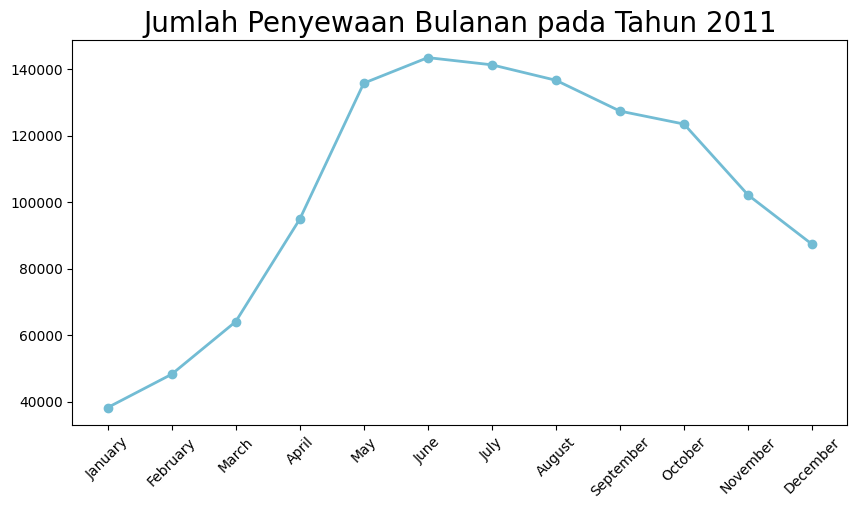

In [25]:
penyewaan_tahun2011 = penyewaan_bulanan[penyewaan_bulanan['year'] == 2011]

plt.figure(figsize=(10, 5))
plt.plot(
    penyewaan_tahun2011["bulan"],
    penyewaan_tahun2011["penyewaan_total"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Penyewaan Bulanan pada Tahun 2011", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

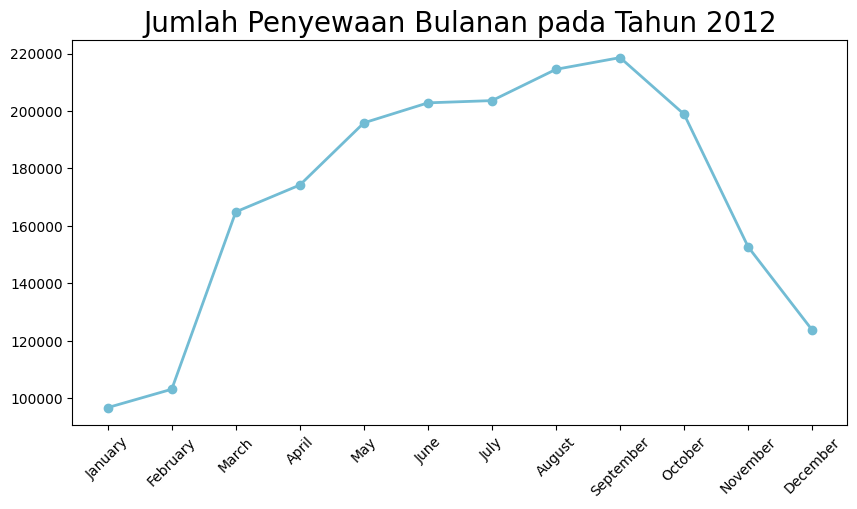

In [26]:
penyewaan_tahun2012 = penyewaan_bulanan[penyewaan_bulanan['year'] == 2012]

plt.figure(figsize=(10, 5))
plt.plot(
    penyewaan_tahun2012["bulan"],
    penyewaan_tahun2012["penyewaan_total"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Penyewaan Bulanan pada Tahun 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

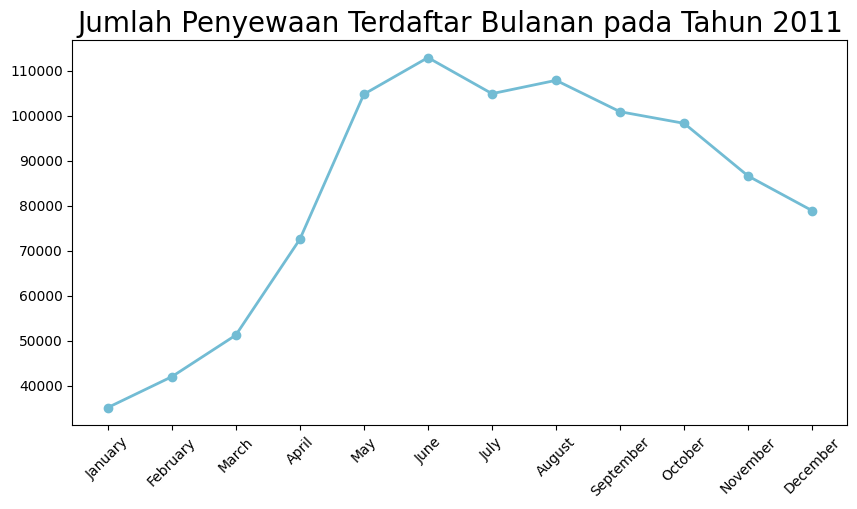

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(
    penyewaan_tahun2011["bulan"],
    penyewaan_tahun2011["penyewaan_terdaftar"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Penyewaan Terdaftar Bulanan pada Tahun 2011", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

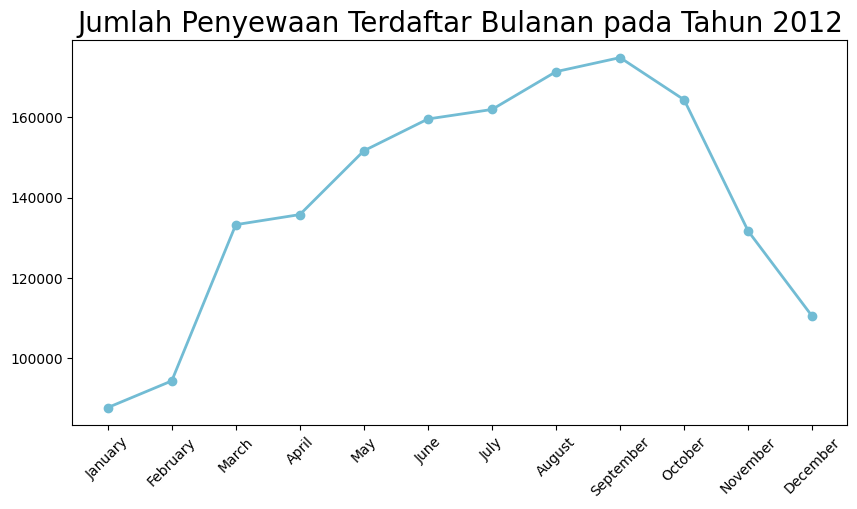

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(
    penyewaan_tahun2012["bulan"],
    penyewaan_tahun2012["penyewaan_terdaftar"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah Penyewaan Terdaftar Bulanan pada Tahun 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Pada Jam dan Tanggal Berapa Jumlah Penyewa Sepeda Terbanyak?

In [29]:
jam_penyewa_terbanyak = hour_df.groupby(["dteday", "hr"])["cnt"].sum().sort_values(ascending=False).reset_index()
jam_penyewa_terbanyak["datetime"] = pd.to_datetime(
    jam_penyewa_terbanyak["dteday"].dt.date.astype(str) + " " + jam_penyewa_terbanyak["hr"].astype(str) + ":00"
)
jam_penyewa_terbanyak["total penyewaan"] = jam_penyewa_terbanyak["cnt"]
jam_penyewa_terbanyak = jam_penyewa_terbanyak.drop(columns=["dteday", "hr", "cnt"])
jam_penyewa_terbanyak.head()

,datetime,total penyewaan
0,2012-09-12 18:00:00,977
1,2012-09-20 17:00:00,976
2,2012-09-11 17:00:00,970
3,2012-09-10 18:00:00,968
4,2012-09-25 17:00:00,967


<ipython-input-30-00c2690723f7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total penyewaan", y="datetime", data=penyewa_terbanyak, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

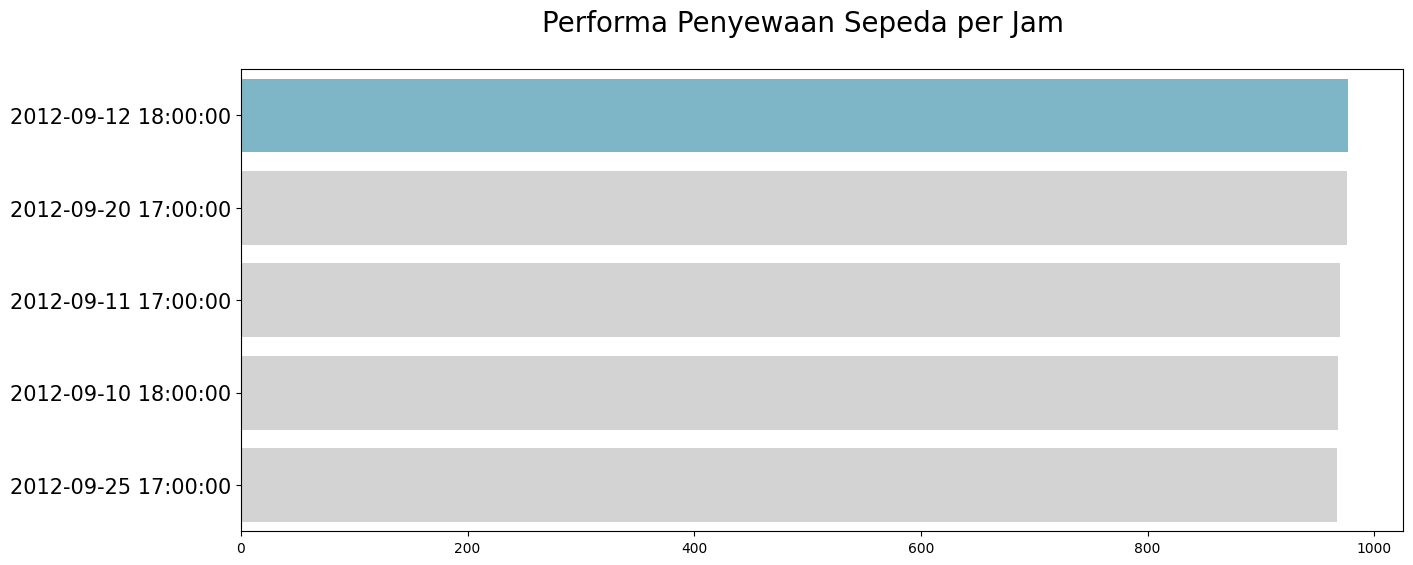

In [30]:
penyewa_terbanyak = jam_penyewa_terbanyak.sort_values(by="total penyewaan", ascending=False).head(5)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total penyewaan", y="datetime", data=penyewa_terbanyak, palette=colors)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title(" ", loc="center", fontsize=18)
ax.tick_params(axis='y', labelsize=15)

plt.suptitle("Performa Penyewaan Sepeda per Jam", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana Pengaruh Suhu yang Dirasa Terhadap Jumlah Penyewaan Sepeda?

Melakukan Clustering manual grouping pada suhu atemp. dikelompokkan berdasarkan rentang suatu suhu agar lebih mudah untuk dibaca.

In [31]:
suhu_utk_penyewaan = day_df.groupby(by="atemp_group").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
}).reset_index()

suhu_utk_penyewaan.rename(columns={
    "registered": "penyewaan_terdaftar",
    "casual": "penyewaan_kasual",
    "cnt": "total_penyewaan"
}, inplace=True)


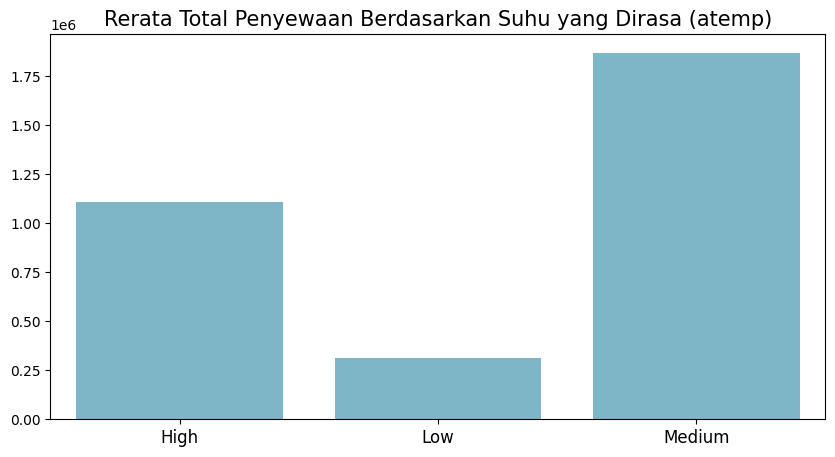

In [32]:
average_penyewaan = suhu_utk_penyewaan.groupby("atemp_group")["total_penyewaan"].mean().reset_index()


plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_penyewaan",
    x="atemp_group",
    data=average_penyewaan,
    color="#72BCD4"
)
plt.title("Rerata Total Penyewaan Berdasarkan Suhu yang Dirasa (atemp)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Jumlah penyewa baik penyewa terdaftar maupun total penyewa mengalami penurunan disetiap awal tahunnya, kemudian terjadi lonjakan penyewa dipertengahan tahun disetiap tahunnya dan ditutup dengan penurunan disetiap tahunnya
- Jumlah penyewa terbanyak terjadi pada 12 September 2012 pada jam 18 dengan total penyewaan sebesar 977. kemudian dibawahnya cukup tipis sebesar 976 pada 20 September 2012 pada jam 17.
- Rata-rata pengguna melakukan transaksi penyewaan sepeda ketika suhu yang dirasa medium.

## Analisis Lanjutan (Opsional)

## Conclusion

###Pertanyaan 1: Bagaimana Performa Jumlah Penyewaan Sepeda dan Pengguna Terdaftar dalam Beberapa Bulan Terakhir?



Data jumlah penyewaan sepeda baik dari penyewa terdaftar maupun total penyewa pada tahun 2011 dan tahun 2012 memiliki pola yang sama, yaitu dimulai dengan jumlah penyewa yang relatif kecil pada awal tahun, kemudian terjadi lonjakan pada pertengahan tahun disetiap tahunnya, dan menutup akhir tahun di setiap tahunnya dengan penurunan jumlah penyewaan.

###Pertanyaan 2: Pada Jam dan Tanggal Berapa Jumlah Penyewa Sepeda Terbanyak?:

Pada grafik yang diperoleh, jumlah penyewa terbanyak terjadi pada 12 September 2012 pada jam 18 dengan total penyewaan sebesar 977. kemudian dibawahnya cukup tipis sebesar 976 pada 20 September 2012 pada jam 17.

###Pertanyaan 3: Bagaimana Pengaruh Suhu yang Dirasa Terhadap Jumlah Penyewaan Sepeda?

Rata-rata pengguna melakukan transaksi penyewaan sepeda ketika suhu yang dirasa medium.